In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp,ttest_ind
import scipy.stats as stats
import seaborn as sns


## Problem objective:
As a data scientist, you must conduct exploratory data analysis and hypothesis testing to enhance your comprehension of the diverse factors influencing customer acquisition.

In [2]:
mt_data = pd.read_csv('marketing_data.csv')

In [3]:
mt_df= pd.DataFrame(mt_data)

In [4]:
mt_df.shape

(2240, 28)

In [5]:
mt_df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [6]:
mt_df.columns = mt_df.columns.str.strip()

In [7]:
mt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [8]:
mt_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


## Data Sampling

In [9]:
mt_df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

## Step 1 :

In [10]:
mt_df['Income'].describe()

count           2216
unique          1974
top       $7,500.00 
freq              12
Name: Income, dtype: object

In [11]:
## Fix the income filed for further analysis


In [12]:
mt_df['Income'] = mt_df['Income'].replace('[\$,]', '', regex=True).astype(float)

In [13]:
mt_df['Income'].fillna(mt_df['Income'].mean(), inplace=True)

In [14]:
mt_df['Income'].describe()

count      2240.000000
mean      52247.251354
std       25037.797168
min        1730.000000
25%       35538.750000
50%       51741.500000
75%       68289.750000
max      666666.000000
Name: Income, dtype: float64

<AxesSubplot: xlabel='Income'>

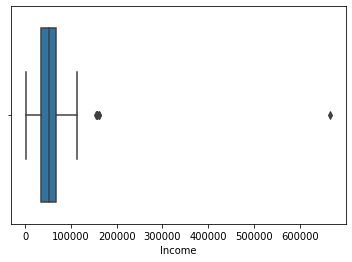

In [15]:
sns.boxplot(x=mt_df['Income'])

In [16]:
##Age from 'Dt_Customer'

In [17]:
mt_df['Age'] = 2025 - mt_df['Year_Birth']

In [18]:
mt_df['Education'].unique()            

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

In [19]:
mt_df['Education'].value_counts()        

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [20]:
mt_df['Marital_Status'].unique()        

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Alone', 'Absurd'], dtype=object)

In [21]:
mt_df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

In [22]:
# Data cleaning for Status
mt_df['Marital_Status'] = mt_df['Marital_Status'].replace({
    'Alone': 'Single',
    'YOLO': 'Single',
    'Absurd': 'Single',
    'Together': 'Married', 
})

In [23]:
mt_df['Marital_Status'].value_counts()

Married     1444
Single       487
Divorced     232
Widow         77
Name: Marital_Status, dtype: int64

## Step 3

In [24]:
## Step 3 Data Engineering

mt_df['Total_Children'] = mt_df['Kidhome'] + mt_df['Teenhome']

In [25]:
mt_df['Total_Children'].value_counts()

1    1128
0     638
2     421
3      53
Name: Total_Children, dtype: int64

In [26]:
## to get the Customer age to get spending info
mt_df['Age'] = 2025 - mt_df['Year_Birth']

In [27]:
spend_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 
              'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']


In [28]:

mt_df['Total_Spend'] = mt_df[spend_cols].sum(axis=1)

In [29]:
mt_df[['Total_Children', 'Age', 'Total_Spend']].describe()


,Total_Children,Age,Total_Spend
count,2240.000000,2240.000000,2240.000000
mean,0.950446,56.194196,605.798214
std,0.751803,11.984069,602.249288
min,0.000000,29.000000,5.000000
25%,0.000000,48.000000,68.750000
50%,1.000000,55.000000,396.000000
75%,1.000000,66.000000,1045.500000
max,3.000000,132.000000,2525.000000


In [30]:
channel_cols = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
mt_df['Total_Purchases'] = mt_df[channel_cols].sum(axis=1)

In [31]:
mt_df['Total_Purchases'].describe()

count    2240.000000
mean       12.537054
std         7.205741
min         0.000000
25%         6.000000
50%        12.000000
75%        18.000000
max        32.000000
Name: Total_Purchases, dtype: float64

In [32]:
mt_df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Total_Purchases']].head()

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Total_Purchases
0,4,4,6,14
1,7,3,7,17
2,3,2,5,10
3,1,0,2,3
4,3,1,2,6


## Step 4 Outlies

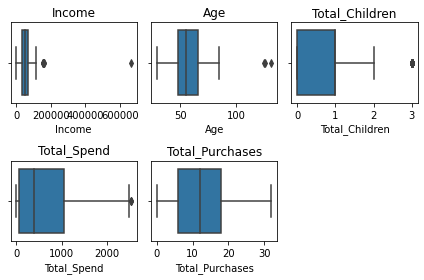

In [33]:
cols_to_plot = ['Income', 'Age', 'Total_Children', 'Total_Spend', 'Total_Purchases']


for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=mt_df[col])
    plt.title(f'{col}')
plt.tight_layout()
plt.show()

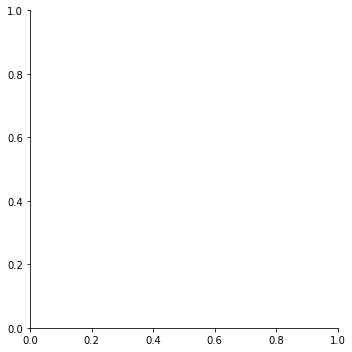

In [34]:
sns.displot()

<AxesSubplot: xlabel='Total_Purchases'>

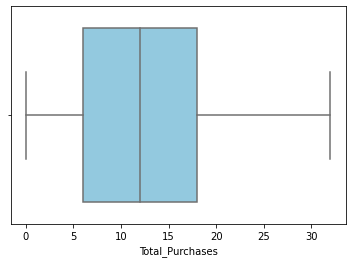

In [35]:
sns.boxplot(x=mt_df[col], color='skyblue', orient='h')


Outlier Treatment Using IQR (Clipping)
 Step 1: Define the function

In [39]:
def clip_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower_bound, upper_bound)

In [40]:
##Step 2: Apply to your target columns
for col in cols_to_plot:
    clip_outliers_iqr(mt_df, col)


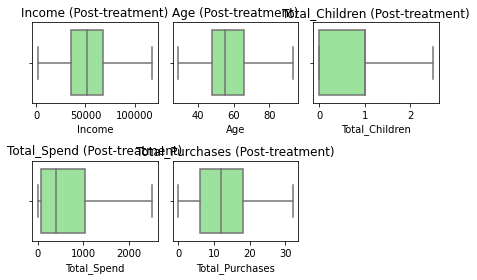

In [41]:
##Step 3 (Optional): Re-plot boxplots to confirm outliers are handled
for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=mt_df[col], color='lightgreen')
    plt.title(f'{col} (Post-treatment)')
plt.tight_layout()
plt.show()
